<a href="https://colab.research.google.com/github/4hdAnuj/deep-learning-aiml/blob/main/orlface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train samples: (240, 10304)
y_train samples: (240,)
x_test shape: (160, 10304)
y_test samples: (160,)
x_train shape: (228, 112, 92, 1)
y_train shape: (228, 20)
x_test shape: (160, 112, 92, 1)
y_test shape: (160, 20)
Total elements in x_train: 2349312


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 - 13s - 13s/step - accuracy: 0.0526 - loss: 3.0328 - val_accuracy: 0.0000e+00 - val_loss: 3.3794
Epoch 2/20
1/1 - 0s - 144ms/step - accuracy: 0.0439 - loss: 3.9642 - val_accuracy: 0.0000e+00 - val_loss: 3.1133
Epoch 3/20
1/1 - 0s - 126ms/step - accuracy: 0.0526 - loss: 3.1651 - val_accuracy: 0.2500 - val_loss: 2.9981
Epoch 4/20
1/1 - 0s - 139ms/step - accuracy: 0.0570 - loss: 3.0056 - val_accuracy: 0.0833 - val_loss: 3.0001
Epoch 5/20
1/1 - 0s - 136ms/step - accuracy: 0.0526 - loss: 2.9853 - val_accuracy: 0.0833 - val_loss: 3.0045
Epoch 6/20
1/1 - 0s - 123ms/step - accuracy: 0.0570 - loss: 3.0198 - val_accuracy: 0.0833 - val_loss: 3.0030
Epoch 7/20
1/1 - 0s - 139ms/step - accuracy: 0.0351 - loss: 3.0053 - val_accuracy: 0.0000e+00 - val_loss: 3.0169
Epoch 8/20
1/1 - 0s - 128ms/step - accuracy: 0.0702 - loss: 3.0000 - val_accuracy: 0.0000e+00 - val_loss: 3.0068
Epoch 9/20
1/1 - 0s - 132ms/step - accuracy: 0.0526 - loss: 2.9810 - val_accuracy: 0.0000e+00 - val_loss: 3.0019


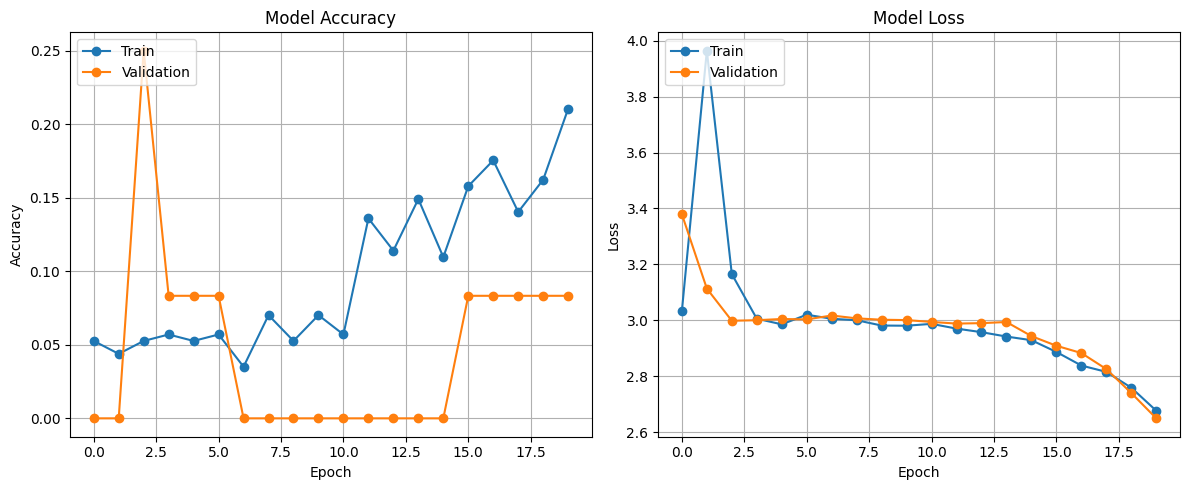

In [1]:
# -*- coding: utf-8 -*-
"""Corrected_ORL_Faces_Model.ipynb

Automatically corrected by ChatGPT.

Original file had several issues related to print statements, model configuration, and data preprocessing.
"""

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from tensorflow.keras import utils
import itertools

# Load dataset
data = np.load('ORL_faces.npz')

# Load the "Train Images"
x_train = data['trainX']
# Normalize every image
x_train = np.array(x_train, dtype='float32') / 255

x_test = data['testX']
x_test = np.array(x_test, dtype='float32') / 255

# Load the Label of Images
y_train = data['trainY']
y_test = data['testY']

# Show the train and test Data format
print('x_train samples: {}'.format(x_train.shape))
print('y_train samples: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test samples: {}'.format(y_test.shape))

# Convert labels to categorical
num_classes = len(np.unique(y_train))  # Automatically determine number of classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split training data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.05, random_state=1234
)

# Define image dimensions and reshape
im_rows, im_cols = 112, 92
batch_size = 512  # Use the defined batch_size variable
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(-1, *im_shape)
x_test = x_test.reshape(-1, *im_shape)
x_valid = x_valid.reshape(-1, *im_shape)

# Print the shapes correctly
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

# Optional: Print total number of elements in x_train
print('Total elements in x_train:', x_train.size)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=(7, 7), activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=54, kernel_size=(5, 5), activation='relu'),  # Removed input_shape
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    # Adjust the number of outputs based on the dataset
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnn_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
cnn_model.summary()

# Train the model
history = cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=20,  # Increased epochs for better training
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=[TensorBoard(log_dir='./logs')]
)

# Evaluate the model on test data
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('Test Loss: {:.4f}'.format(score[0]))
print('Test Accuracy: {:.4f}'.format(score[1]))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()
